# ** Stock Prediction using Random Forest Regression**

### *Importing Libraries*

In [2]:
import pandas as pd
import numpy as np

### *Load Dataset*

In [3]:
dataset = pd.read_csv("C:\\Users\\HAI\Downloads\\EW-MAX.csv")

### *Summarize Dataset*

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [5]:
dataset.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600
4391,2017/9/8,112.300003,114.790001,112.010002,113.190002,113.190002,1611700


In [6]:
dataset.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03
mean,30.562539,30.893618,30.238833,30.572580,30.572580,1.884027e+06
std,29.914758,30.210974,29.615761,29.905778,29.905778,1.621609e+06
min,3.296875,3.390625,3.000000,3.250000,3.250000,1.904000e+05
25%,8.718125,8.803125,8.625000,8.712500,8.712500,1.088800e+06
50%,14.766250,14.981250,14.662500,14.767500,14.767500,1.539300e+06
75%,42.546248,43.051249,42.086249,42.539999,42.539999,2.188900e+06
max,121.080002,121.750000,120.169998,121.360001,121.360001,4.641260e+07


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [8]:
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

<AxesSubplot:>

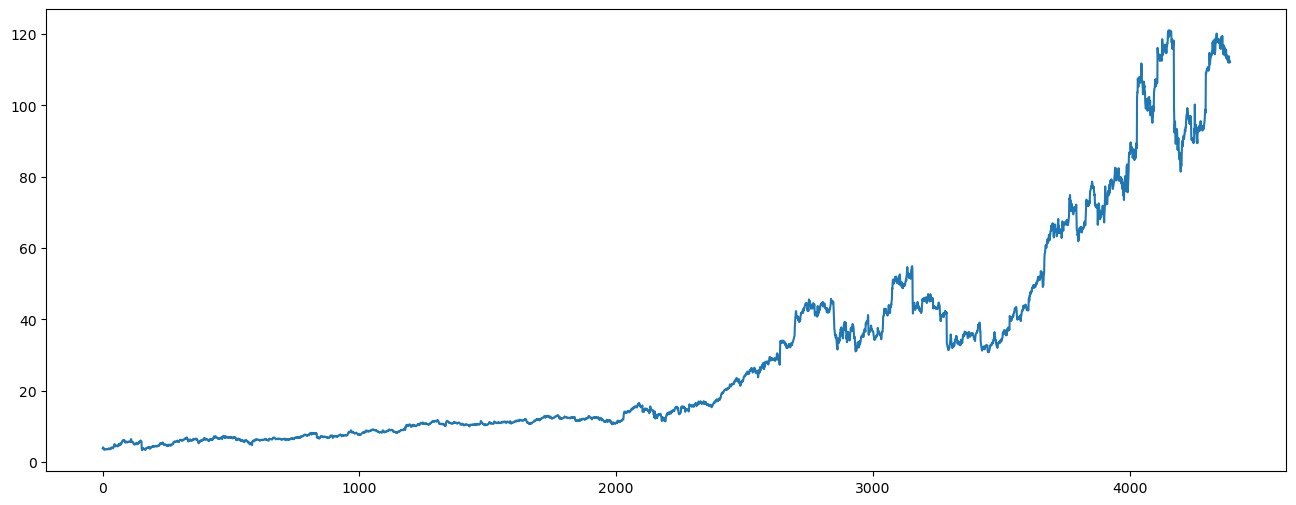

In [9]:
dataset['Open'].plot(figsize = (16,6))


### *Segregate Dataset into Input X & Output Y*

In [10]:
X = dataset[['Open','High','Low','Volume']].values
X

array([[3.81250000e+00, 4.15625000e+00, 3.81250000e+00, 3.67560000e+06],
       [4.12500000e+00, 4.12500000e+00, 4.00000000e+00, 1.07760000e+06],
       [4.00000000e+00, 4.03125000e+00, 3.95312500e+00, 4.37200000e+05],
       ...,
       [1.12029999e+02, 1.12489998e+02, 1.10250000e+02, 2.13670000e+06],
       [1.12459999e+02, 1.12900002e+02, 1.12000000e+02, 1.25160000e+06],
       [1.12300003e+02, 1.14790001e+02, 1.12010002e+02, 1.61170000e+06]])

In [11]:
Y  = dataset['Close'].values
Y


array([  4.125   ,   4.015625,   4.      , ..., 112.230003, 112.339996,
       113.190002])

### *Splitting Dataset for Testing our Model*

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

# Fit_Transform - fit method is calculating the mean of variance of each of the features present in our data

# Transform -Transform method is transforming all the features using respective mean and variance 


In [13]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

### *Training Dataset using Support Linear Regression*

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [21]:
ypred = model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)
print("Root Mean Square Error:",rmse)
r2score = r2_score(y_test,ypred)
print("R2Score",r2score*100)

Root Mean Square Error: 0.36495209030065984
R2Score 99.98534174996895


In [26]:
dfr = pd.DataFrame({'Actual':y_test.flatten(),'predicted':ypred.flatten()})
dfr.head(25).style.background_gradient(cmap = 'Greens')

,Actual,predicted
0,106.860001,106.521399
1,10.630000,10.672700
2,6.630000,6.658875
3,13.000000,13.035375
4,12.297500,12.324725
5,8.327500,8.361100
6,15.302500,15.415575
7,12.442500,12.393750
8,5.312500,5.269562
9,21.885000,21.915325


<AxesSubplot:>

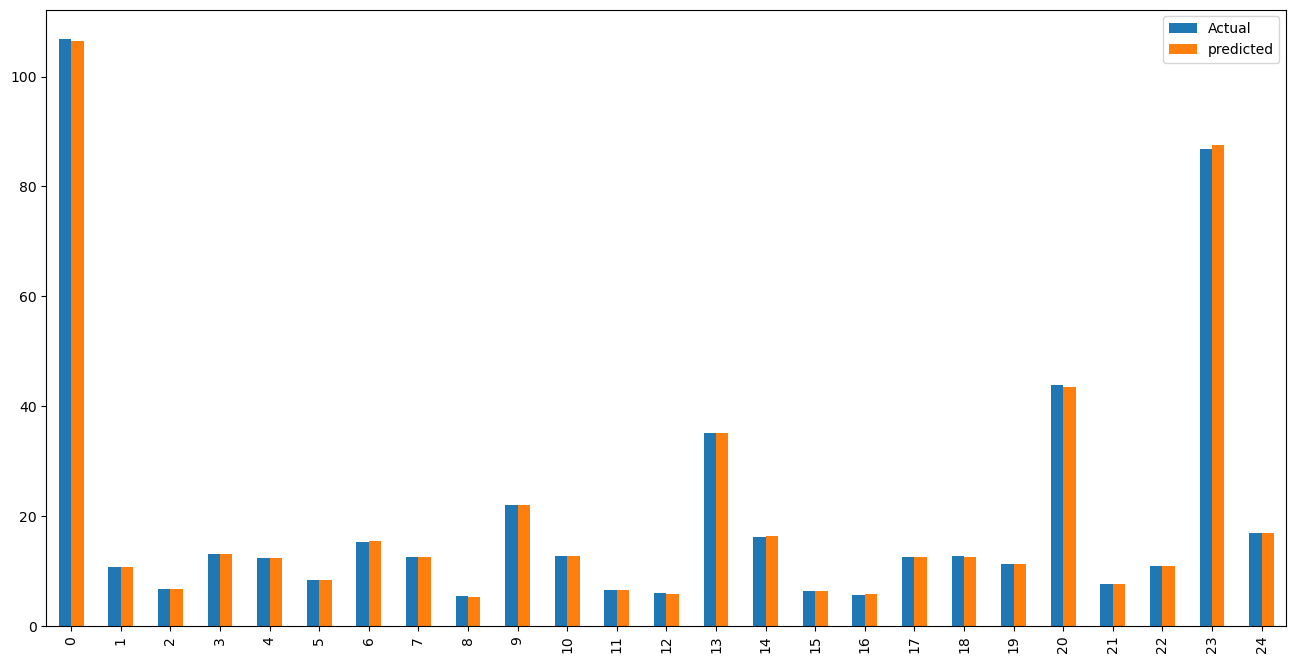

In [27]:
graph = dfr.head(25)

graph.plot(kind = 'bar',figsize = (16,8))
